# Project - $k$-Nearest-Neighbors Classifier
- Create a $k$-Nearest-Neighbors Classifier supporting 3 dimensions
- Investigate whether it performs better

### Step 1: Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Step 2: Read data

In [17]:
df=pd.read_csv('df/weather.csv',parse_dates=True,index_col=0)

In [18]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,22.0,...,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,0.0,No
2017-06-22,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,...,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,0.0,No
2017-06-23,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,15.0,...,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,0.0,No


### Step 3: Investigate data types
- Use [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
- The goal is to identify all columns with datatype **float64** for next step

In [19]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

### Step 4: Choose 3 columns to create datasets
- Use **Humidity3pm** and **Pressure3pm** together with another column to predict **RainTomorrow**
- Make a list of three column names **'Humidity3pm', 'Pressure3pm', INSERT YOUR CHOICE** (should be one with dtype *float64*, e.g., **Cloud3pm**), and **'RainTomorrow'**
- Create the dataset consisting of these 4 columns

In [20]:
datasets=df[['Humidity3pm', 'Pressure3pm','WindGustSpeed','RainTomorrow']]
datasets

,Humidity3pm,Pressure3pm,WindGustSpeed,RainTomorrow
Date,,,,
2008-02-01,84.0,1017.4,NaN,Yes
2008-02-02,73.0,1016.4,NaN,Yes
2008-02-03,86.0,1015.6,NaN,Yes
2008-02-04,90.0,1011.8,NaN,Yes
2008-02-05,74.0,1004.8,NaN,Yes
...,...,...,...,...
2017-06-21,52.0,1025.3,37.0,No
2017-06-22,53.0,1024.6,30.0,No
2017-06-23,56.0,1015.0,24.0,No


/Users/prathamjoshi/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Humidity3pm', ylabel='Pressure3pm'>

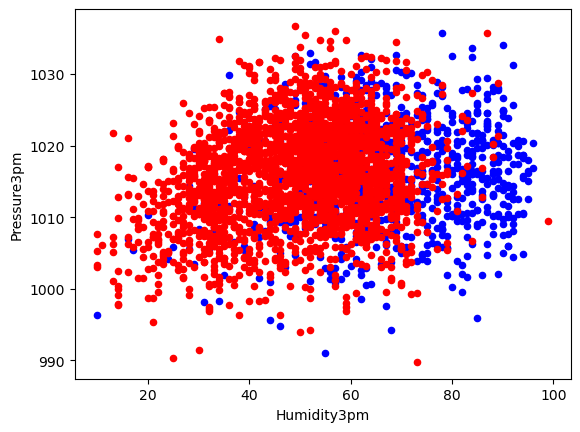

In [21]:
fig,ax=plt.subplots()
datasets[datasets['RainTomorrow']=='Yes'].plot.scatter(x='Humidity3pm',y='Pressure3pm',c='b',ax=ax)
datasets[datasets['RainTomorrow']=='No'].plot.scatter(x='Humidity3pm',y='Pressure3pm',c='r',ax=ax)

### Step 5: Deal with remaining missing data
- A simple choice is to simply remove rows with missing data
- Use [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [22]:
average = df['WindGustSpeed'].mean()
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(average)

In [23]:
datasets=df[['Humidity3pm', 'Pressure3pm','WindGustSpeed','RainTomorrow']]
datasets

,Humidity3pm,Pressure3pm,WindGustSpeed,RainTomorrow
Date,,,,
2008-02-01,84.0,1017.4,41.761408,Yes
2008-02-02,73.0,1016.4,41.761408,Yes
2008-02-03,86.0,1015.6,41.761408,Yes
2008-02-04,90.0,1011.8,41.761408,Yes
2008-02-05,74.0,1004.8,41.761408,Yes
...,...,...,...,...
2017-06-21,52.0,1025.3,37.000000,No
2017-06-22,53.0,1024.6,30.000000,No
2017-06-23,56.0,1015.0,24.000000,No


In [24]:
datasets_clean=datasets.dropna()
datasets_clean

,Humidity3pm,Pressure3pm,WindGustSpeed,RainTomorrow
Date,,,,
2008-02-01,84.0,1017.4,41.761408,Yes
2008-02-02,73.0,1016.4,41.761408,Yes
2008-02-03,86.0,1015.6,41.761408,Yes
2008-02-04,90.0,1011.8,41.761408,Yes
2008-02-05,74.0,1004.8,41.761408,Yes
...,...,...,...,...
2017-06-21,52.0,1025.3,37.000000,No
2017-06-22,53.0,1024.6,30.000000,No
2017-06-23,56.0,1015.0,24.000000,No


In [25]:
print(len(datasets),len(datasets_clean))
print("rows nahi aahet te aahet",len(datasets)-len(datasets_clean))

3337 3309
rows nahi aahet te aahet 28


### Step 6: Create training and test datasets
- Define dataset **X** to be the data consisting of the three columns.
- Define dataset **y** to be datset cosisting of **'RainTomorrow'**.
    - HINT: Use list comprehension to transform **'No'** and **'Yes'** to 0 and 1, repectively (like in the Lesson)
- Divide into **X_train, X_test, y_train, y_test** with **train_test_split**
    - HINT: See how it is done in Lesson
    - You can use **random_state=42** (or any other number) if you want to reproduce results.

In [26]:
X=datasets_clean[['Humidity3pm','Pressure3pm','WindGustSpeed']]
y=datasets_clean['RainTomorrow']
y=np.array([1 if value =='Yes' else 0 for value in y])

In [27]:
y

array([1, 1, 1, ..., 0, 0, 0])

### Step 7: Train and test the model
- Create classifier with **KNeighborsClassifier**
    - You can play around with n_neighbors (default =5)
- Fit the model with training data **(X_train, y_train**)
- Predict data from **X_test** (use predict) and assign to **y_pred**.
- Evalute score by using **metrics.accuracy_score(y_test, y_pred)**.

In [28]:
X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=42)

In [29]:
X_train.iloc[0]

Humidity3pm        25.000000
Pressure3pm      1016.500000
WindGustSpeed      41.761408
Name: 2008-09-16 00:00:00, dtype: float64

In [30]:
neigh=KNeighborsClassifier()
neigh.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred=neigh.predict(X_test)

In [32]:
y_pred[:5]

array([0, 0, 0, 0, 1])

In [33]:
print('accuracy score=',accuracy_score(y_test,y_pred)*100 ,'%')

accuracy score= 82.0048309178744 %


In [34]:
sum(y==0)/len(y)

0.7407071622846781

In [35]:
sum(y==1)/len(y)

0.25929283771532186

In [36]:
scores = []
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

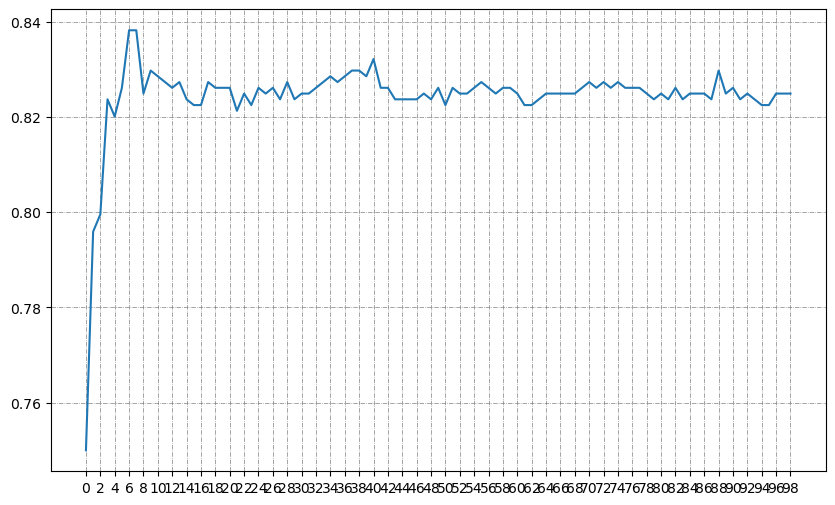

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
_=ax.plot(scores)

plt.grid(which='both', color='gray', linestyle='-.', linewidth=0.5)
plt.xticks(np.arange(0, 100, 2))

plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors=8)

In [39]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}